In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('04_05/poll.csv')

In [5]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [6]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [7]:
dist = pd.DataFrame({'Brown' : [sample(0.50, 1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

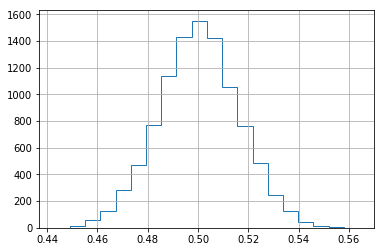

In [8]:
dist.Brown.hist(histtype='step', bins=20)

In [9]:
scipy.stats.percentileofscore(dist.Brown, 0.511)

75.605000000000004

In [10]:
pvalue = 100 - scipy.stats.percentileofscore(dist.Brown, 0.511)
print(pvalue)

24.395


In [11]:
# 24% is Not enough to reject the null hypothesis of that Green ties or
# wins.

In [12]:
largepoll = pd.read_csv('04_05/poll-larger.csv')

In [13]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [14]:
dist = pd.DataFrame({'Green': [sample(0.50, 10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

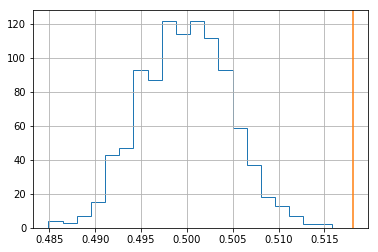

In [15]:
dist.Green.hist(histtype='step', bins=20)
pp.axvline(0.5181, c='C1')

In [ ]:
# Here, the value's so extreme that it's not even included in 
# our finite sampling distribution.

# We conclude that the P value for rejecting the null 
# hypothesis that Brown wins or ties is one over 1000 or less, 
# which qualifies as very significant. An interesting question 
# is whether one can apply bootstrapping to compute the values. 
# It is all trivial, because bootstrapping can only represent the 
# true distribution, not the distribution under the null hypothesis, 
# so we would need to modify the bootstrap values to be appropriate 
# for the null case, which in some cases is straightforward and not 
# as impossible.